In [1]:
#importing necessary packages 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#loading CSVs
df1=pd.read_excel('2017_energy_consumption.xlsx')
df2=pd.read_excel('2018_final_data_set.xlsx')
df3=pd.read_excel('2019_final_data_set.xlsx')
df4=pd.read_excel('2020_final_data_set.xlsx')

In [3]:
#renaming the column so all the data can be added on rows 
df4.rename(columns={'Annual Flow (M)': 'Annual Flow (M'}, inplace=True)

In [4]:
#creating a mega dataframe 
df=pd.concat([df1,df2,df3,df4],axis=0)

In [5]:
#copying the df, jusst in case...
dfcopy=df.copy()

In [6]:
#getting the basic info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67658 entries, 0 to 16847
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sector                                   67658 non-null  object 
 1   SubSector                                67658 non-null  object 
 2   Organization                             67658 non-null  object 
 3   Operation                                67658 non-null  object 
 4   Operation Type                           67658 non-null  object 
 5   Address                                  67612 non-null  object 
 6   City                                     67657 non-null  object 
 7   Postal Code                              67580 non-null  object 
 8   Total Indoor Space_x                     67658 non-null  float64
 9   Unit of Measure                          65622 non-null  object 
 10  Weekly Average Hours                     67658 non-

In [7]:
#checking the unit of measures to standardize the measurements 
df['Unit of Measure'].value_counts()

Unit of Measure
Square feet      52895
Square meters    12726
Mètres carrés        1
Name: count, dtype: int64

In [8]:
#converting sqm to sqf
unit_conversion = {'Square meters': 10.764, 'Square feet': 1}
df['Total Indoor Space'] = df['Total Indoor Space_x'] * df['Unit of Measure'].map(unit_conversion)
df.drop(columns=['Total Indoor Space_x', 'Unit of Measure'], inplace=True)

move_col=df.pop('Total Indoor Space')
df.insert(8,'Total_space',move_col)

In [9]:
df.isna().sum()

Sector                                         0
SubSector                                      0
Organization                                   0
Operation                                      0
Operation Type                                 0
Address                                       46
City                                           1
Postal Code                                   78
Total_space                                 2037
Weekly Average Hours                           0
Annual Flow (M                              7031
Number of Portables                           26
Swimming Pool                              41802
Electricity_Quantity                          10
Electricity_Unit                            1161
NaturalGas_Quantity                          357
NaturalGas_Unit                            23206
FuelOil12_Quantity                           567
FuelOil12_Unit                             65762
FuelOil46_Quantity                           590
FuelOil46_Unit      

In [10]:
#the electricity quantity column happens to have some nan values which cannot be ignored since the column is considered crucial 
mean_value = df['Electricity_Quantity'].mean()

# Replace NaN values with the mean
df['Electricity_Quantity'].fillna(mean_value, inplace=True)

In [11]:
#setting a threshold for null values and dropping the columns with null values above that
threshold = 3000 
columns_to_drop = df.columns[df.isnull().sum() > threshold].tolist()
df.drop(columns=columns_to_drop, inplace=True)
columns_to_drop 

['Annual Flow (M',
 'Swimming Pool',
 'NaturalGas_Unit',
 'FuelOil12_Unit',
 'FuelOil46_Unit',
 'Propane_Unit',
 'Coal_Unit',
 'Wood_Unit',
 'DistrictHeating_Unit',
 'DistrictHeating_IsRenewable',
 'DistrictCooling_Unit',
 'DistrictCooling_IsRenewable']

In [38]:
df

,Sector,SubSector,Organization,Operation,Operation Type,Address,City,Postal Code,Total_space,Weekly Average Hours,Number of Portables,Electricity_Quantity,NaturalGas_Quantity,Propane_Quantity,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity GJ_m2,LATITUDE,LONGITUDE
0,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,91214.1360,168.00,0.0,1.921713e+06,415458.635370,0.0,818719.109374,69.475690,2.692183,43.037474,-80.883613
1,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,91214.1360,168.00,0.0,1.961917e+06,439234.659216,0.0,888399.643901,72.686736,2.816611,43.037474,-80.883613
2,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,91214.1360,168.00,0.0,1.871966e+06,447996.244483,0.0,904038.214491,72.721431,2.817955,43.037474,-80.883613
3,Public Hospital,Acute/Chronic Hospital,Alexandra Hospital,"Alexandra Hospital, Ingersoll",Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,91213.2886,168.00,0.0,1.982890e+06,423292.227719,0.0,850748.303252,71.059125,2.753541,43.037474,-80.883613
4,Public Hospital,Acute/Chronic Hospital,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Facilities used for hospital purposes,20260 County Road 43,Alexandria,K0C1A0,54969.0000,168.00,0.0,1.468403e+06,246218.000000,0.0,490906.833780,74.317397,2.879799,45.301001,-74.586118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65746,Municipal,Municipal Service Board,Windsor Utilities Commission,OTP,Facilities related to the treatment of water,3665 Wyandotte Street East,Windsor,N9A5T7,0.0000,51.23,0.0,9.346453e+05,231565.000000,0.0,461587.894849,0.000000,0.000000,42.298744,-83.023282
65747,Municipal,Municipal Service Board,Windsor Utilities Commission,AH Weeks Treatment Plant,Facilities related to the treatment of water,3665 Wyandotte Street East,Windsor,N9A5T7,0.0000,168.00,0.0,6.107395e+06,351908.100000,0.0,820747.943339,0.000000,0.000000,42.298744,-83.023282
65748,Municipal,Municipal Service Board,Windsor Utilities Commission,AJ Brian Pump Station,Facilities related to the pumping of water,3650 Wyandotte Street East,Windsor,N9A5T7,0.0000,168.00,0.0,2.277907e+06,99242.150000,0.0,245598.065664,0.000000,0.000000,42.298744,-83.023282
65749,Municipal,Municipal Service Board,Windsor Utilities Commission,George Pump Station,Facilities related to the pumping of water,895 George Avenue,Windsor,N9A5T7,0.0000,168.00,0.0,2.416786e+06,0.000000,0.0,61502.370128,0.000000,0.000000,42.298744,-83.023282


In [12]:
#dropping columns that predominantly have zeros (in thousands)
df=df.drop(columns=['DistrictHeating_RenewableEmissionFactor','DistrictCooling_RenewableEmissionFactor','DistrictHeating_Quantity','DistrictCooling_Quantity','Coal_Quantity','Wood_Quantity','Electricity_Unit','Energy Intensity GJ_mega_litre','Energy Intensity ekWh_mega_litre','FuelOil46_Quantity','FuelOil12_Quantity'],axis=1)

In [13]:
#dropping null and duplicates 
df=df.dropna()
df=df.drop_duplicates()

In [14]:
#renaming columns accordingly 
df.rename(columns={'Electricity_Quantity_kwh': 'Electricity_Quantity'}, inplace=True)

The data here is cannot be simply cleaned for outliers since the outliers in some cases may actually indicate energy consumption of certain entities. Regardless their usecase the skew induced by the outliers are very prominent and needs to be fixed to gain more insights 

In [15]:
#creating seperate dfs for top 10 so that handling outliers doesnt skew the data 
top_emissions = df.nlargest(10, 'GHG Emissions KG')
largest_spaces=df.nlargest(10, 'Total_space')
top_electricity=df.nlargest(10,'Electricity_Quantity')

In [16]:
#creating a dataframe with only numeric columns 
dfn=df.select_dtypes(include='float64')

In [17]:
#checking correlation 
dfn.corrwith(dfn['GHG Emissions KG'])

Total_space                   0.000407
Weekly Average Hours          0.002303
Number of Portables          -0.001341
Electricity_Quantity          0.061636
NaturalGas_Quantity           0.059200
Propane_Quantity             -0.000226
GHG Emissions KG              1.000000
Energy Intensity ekWh_sqft    0.000915
Energy Intensity GJ_m2        0.000915
dtype: float64

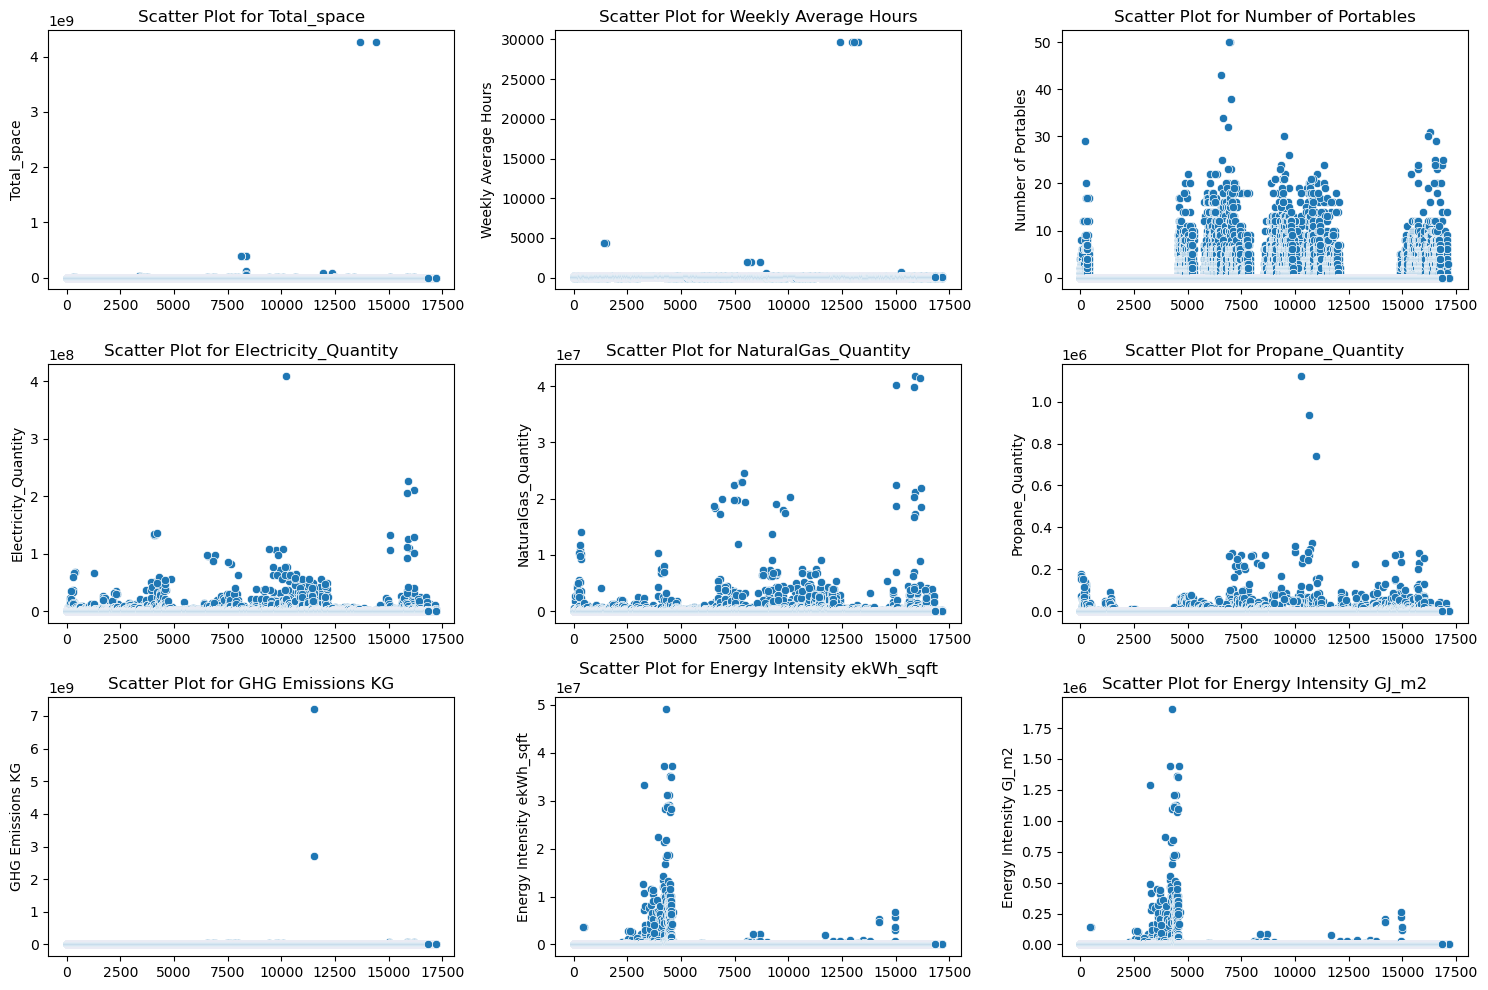

In [18]:
#creating a dash of scatterplots to check outliers 
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(dfn.columns):
    sns.scatterplot(data=dfn, x=df.index, y=column, ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {column}')

plt.tight_layout()

plt.show()

The above visualizations reveal the outliers in the numeric columns in the df. with the insight we can work on to remove the outliers by setting a threshold value.

In [19]:
#we can use this techniqe to check for the values to set a threshold.
df['Total_space'].sort_values(ascending=False).head(15)

13668    4.261575e+09
14426    4.261575e+09
8266     3.857886e+08
8353     3.857886e+08
8352     3.857886e+08
8112     3.857850e+08
8111     3.857850e+08
8330     1.130973e+08
11942    9.300096e+07
12340    9.300096e+07
8336     7.265700e+07
8337     5.274360e+07
8328     5.042396e+07
8331     4.881474e+07
8333     3.810456e+07
Name: Total_space, dtype: float64

In [20]:
mean=df['Total_space'].mean()
replace_threshold = 1.130973e+07
replacement_value = mean 

df['Total_space'] = df['Total_space'].where(df['Total_space'] <= replace_threshold, replacement_value)

<Axes: ylabel='Total_space'>

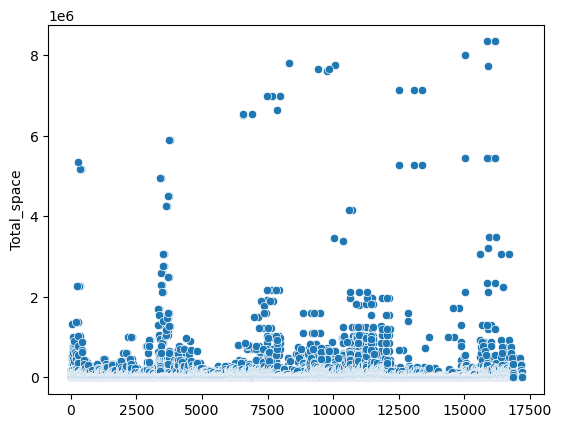

In [21]:
sns.scatterplot(x=df.index, y=df['Total_space'])

#'''we know a week can possibly have 168 hours so it would be wise to remove those outliers but doing so would lead to 
nan values so it should be handled accordingly''' 


In [22]:
replace_threshold = 169.00  
replacement_value = 168.00  

df['Weekly Average Hours'] = df['Weekly Average Hours'].where(df['Weekly Average Hours'] <= replace_threshold, replacement_value)

<Axes: xlabel='Weekly Average Hours', ylabel='Count'>

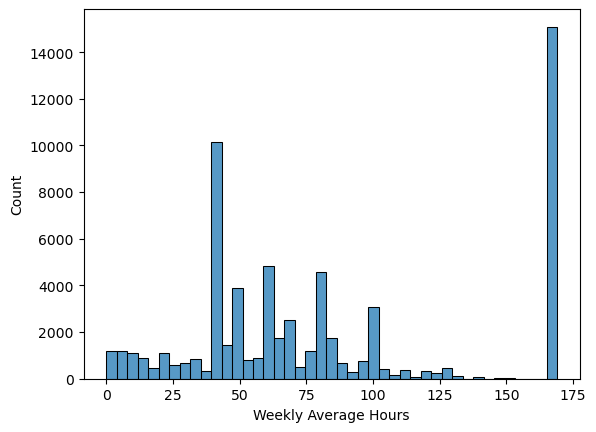

In [23]:
sns.histplot(x=df['Weekly Average Hours'])

In [24]:

#the outliers of the natural gas quantity colummn are far from the average distribution so replacing the outliers with mean is the sound option
df['NaturalGas_Quantity'].sort_values(ascending=False).head(15)

15909    4.187478e+07
16161    4.140006e+07
15034    4.018236e+07
15850    3.979290e+07
7920     2.448531e+07
7808     2.301769e+07
7858     2.289807e+07
15041    2.238376e+07
7478     2.235091e+07
16185    2.190195e+07
15931    2.111829e+07
15864    2.026437e+07
10077    2.025865e+07
6914     1.986954e+07
7621     1.983361e+07
Name: NaturalGas_Quantity, dtype: float64

<Axes: ylabel='NaturalGas_Quantity'>

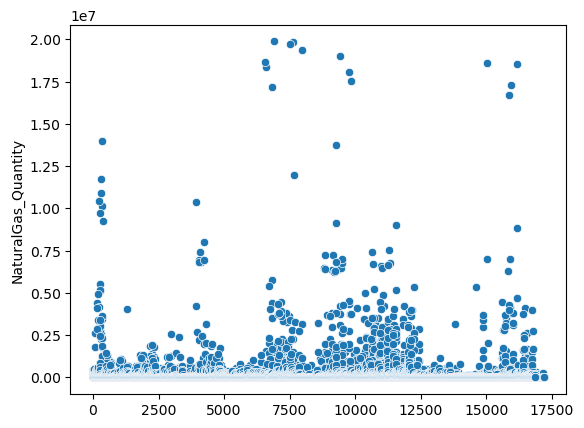

In [25]:
mean=df['NaturalGas_Quantity'].mean()
replace_threshold = 1.986954e+07
replacement_value = mean 

df['NaturalGas_Quantity'] = df['NaturalGas_Quantity'].where(df['NaturalGas_Quantity'] <= replace_threshold, replacement_value)
sns.scatterplot(x=df.index, y=df['NaturalGas_Quantity'])

In [26]:
df['Electricity_Quantity'].sort_values(ascending=False).head(15)

10195    4.096671e+08
15909    2.270600e+08
16161    2.109563e+08
15850    2.044999e+08
4227     1.353882e+08
4087     1.332415e+08
4054     1.317804e+08
4102     1.317804e+08
15038    1.315261e+08
16168    1.286395e+08
15916    1.259391e+08
15857    1.108389e+08
15931    1.098124e+08
10077    1.088120e+08
9422     1.076666e+08
Name: Electricity_Quantity, dtype: float64

<Axes: ylabel='Electricity_Quantity'>

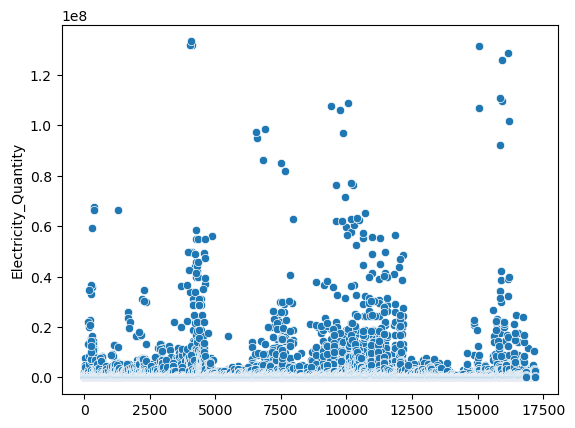

In [27]:
mean=df['Electricity_Quantity'].mean()
replace_threshold = 1.353882e+08
replacement_value = mean 

df['Electricity_Quantity'] = df['Electricity_Quantity'].where(df['Electricity_Quantity'] <= replace_threshold, replacement_value)
sns.scatterplot(x=df.index, y=df['Electricity_Quantity'])

In [28]:
df['Propane_Quantity'].sort_values(ascending=False).head(15)

10296    1.124754e+06
10633    9.355450e+05
10960    7.409290e+05
10786    3.258710e+05
10016    3.120765e+05
10680    2.985938e+05
10010    2.828508e+05
10610    2.808353e+05
15756    2.787365e+05
7062     2.783381e+05
14914    2.711769e+05
7487     2.699687e+05
14682    2.696780e+05
10674    2.685838e+05
8036     2.685280e+05
Name: Propane_Quantity, dtype: float64

<Axes: ylabel='Propane_Quantity'>

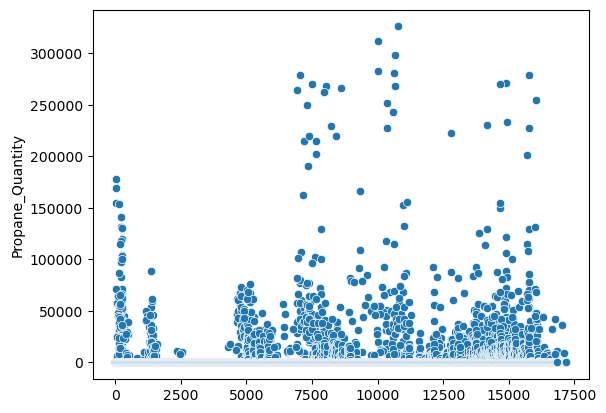

In [29]:
mean=df['Propane_Quantity'].mean()
replace_threshold = 3.258710e+05
replacement_value = mean 

df['Propane_Quantity'] = df['Propane_Quantity'].where(df['Propane_Quantity'] <= replace_threshold, replacement_value)
sns.scatterplot(x=df.index, y=df['Propane_Quantity'])

In [30]:
top_electricity.to_excel('top_electricity.xlsx', index=False)
top_emissions.to_excel('top_emissions.xlsx', index=False)
largest_spaces.to_excel('largest_spaces.xlsx', index=False)

In [31]:
df['Postal Code'] = df['Postal Code'].str.replace(' ', '')
df['Postal Code']

0        N5C3V6
1        K0C1A0
2        P6B4H6
3        P6C3N6
4        P6A3M7
          ...  
16843    M3J1P3
16844    M3J1P3
16845    M3J1P3
16846    M3J1P3
16847    M3J1P3
Name: Postal Code, Length: 64916, dtype: object

In [32]:
latlong=pd.read_csv('CanadianPostalCodes202312.csv')
latlong

,POSTAL_CODE,CITY,PROVINCE_ABBR,TIME_ZONE,LATITUDE,LONGITUDE
0,K8A 5S5,PEMBROKE,ON,5,45.824567,-77.112759
1,G8A 1Y9,JONQUIERE,QC,5,48.414831,-71.263166
2,A2H 1B8,CORNER BROOK,NL,3,48.952115,-57.947328
3,T9S 1N3,ATHABASCA,AB,7,54.721120,-113.259546
4,T8W 2J4,GRANDE PRAIRIE,AB,7,55.134800,-118.784502
...,...,...,...,...,...,...
900683,N2V 2L1,WATERLOO,ON,5,43.465930,-80.587040
900684,J1X 1M8,MAGOG,QC,5,45.269524,-72.157300
900685,L1T 1P6,AJAX,ON,5,43.859873,-79.041727
900686,E3V 4J6,EDMUNDSTON,NB,4,47.407910,-68.336070


In [33]:
latlong['POSTAL_CODE']=latlong['POSTAL_CODE'].str.replace(' ', '')
latlong['POSTAL_CODE']

0         K8A5S5
1         G8A1Y9
2         A2H1B8
3         T9S1N3
4         T8W2J4
           ...  
900683    N2V2L1
900684    J1X1M8
900685    L1T1P6
900686    E3V4J6
900687    E2J1G9
Name: POSTAL_CODE, Length: 900688, dtype: object

In [34]:
latlong.rename(columns={'POSTAL_CODE':'Postal Code'},inplace=True)

In [35]:
latlong.drop(columns=['CITY','PROVINCE_ABBR','TIME_ZONE'],inplace=True)

In [36]:
df = df.merge(latlong, on='Postal Code', how='inner')


In [37]:
df.to_excel('df1.xlsx',index=False)